## The indices table

All the indices and respective spectral lines information is stored in the indices table file, `actin_table.csv`.

The table can be accessed from ACTIN via:

In [1]:
from actin2 import ACTIN
actin = ACTIN()

actin.IndTable().table

,ind_id,ind_var,ln_id,ln_c,ln_ctr,ln_win,bandtype
0,I_CaII,L1,CaIIK,1.0,3933.664,1.09,tri
1,I_CaII,L2,CaIIH,1.0,3968.470,1.09,tri
2,I_CaII,R1,CaIIR1,1.0,3901.070,20.00,sq
3,I_CaII,R2,CaIIR2,1.0,4001.070,20.00,sq
4,I_NaI,L1,NaID1,1.0,5895.920,0.50,sq
5,I_NaI,L2,NaID2,1.0,5889.950,0.50,sq
6,I_NaI,R1,NaIR1,1.0,5805.000,10.00,sq
7,I_NaI,R2,NaIR2,1.0,6097.000,20.00,sq
8,I_Ha16,L1,Ha16,1.0,6562.808,1.60,sq
9,I_Ha16,R1,HaR1,1.0,6550.870,10.75,sq


The columns of the table are following:

- `ind_id`: The index identification. For the spectral lines to be assigned to an index, their `ind_id` entries must have the same index ID.
- `ind_var`: The identification of the line in the index equation: `L1`, `L2`, etc, for activity lines (numerator); `R1`, `R2`, etc, for reference lines (denominator)
- `ln_id`: The spectral line identification.
- `ln_c`: Constant to be multiplied to the flux in each line.
- `ln_ctr`: Line centre (in angstroms).
- `ln_win`: Bandwidth (in angstroms).
- `bandtype`: Function used to integrate the flux in the bandpass: `sq` for square; `tri` for triangular. If using the triangular bandpass, `ln_win` is the full-width-half-maximum of the triangle.

To check the available indices use:

In [2]:
actin.IndTable().indices

['I_CaI', 'I_CaII', 'I_Ha06', 'I_Ha16', 'I_HeI', 'I_NaI']

All indices IDs use the prefix `I_` to identify the name as an index as opposed to the line ID.

Each index should be associated with its required lines, even if reusing the same lines for different indices (e.g. the `HaR1` lines for `I_Ha06` and `I_Ha16` appear repeated in the table).

### Adding new indices

To add a new index, you will need at least an activity sensitive line (with `ind_var` of `L1`) and a reference line (`ind_var` of `R1`), although it is recommended to have two reference lines, at each side of the activity line in the continuum.

As an example let's make a new index based on the FeII line at $\lambda$ 6149.24 (not an activity sensitive index!):

In [3]:
ind_tab = actin.IndTable()

FeII = dict(
    ind_id = "I_FeII",
    ind_var = "L1",
    ln_id = "FeII",
    ln_c = 1,
    ln_ctr = 6149.24,
    ln_win = 0.2,
    bandtype = "sq"
)

FeIIR1 = dict(
    ind_id = "I_FeII",
    ind_var = "R1",
    ln_id = "FeIIR1",
    ln_c = 1,
    ln_ctr = 6146.97,
    ln_win = 1,
    bandtype = "sq"
)

FeIIR2 = dict(
    ind_id = "I_FeII",
    ind_var = "R2",
    ln_id = "FeIIR2",
    ln_c = 1,
    ln_ctr = 6152.42,
    ln_win = 1,
    bandtype = "sq"
)

ind_tab.add_line(**FeII)
ind_tab.add_line(**FeIIR1)
ind_tab.add_line(**FeIIR2)

Now check the new table:

In [4]:
ind_tab.table

,ind_id,ind_var,ln_id,ln_c,ln_ctr,ln_win,bandtype
0,I_CaII,L1,CaIIK,1.0,3933.664,1.09,tri
1,I_CaII,L2,CaIIH,1.0,3968.470,1.09,tri
2,I_CaII,R1,CaIIR1,1.0,3901.070,20.00,sq
3,I_CaII,R2,CaIIR2,1.0,4001.070,20.00,sq
4,I_NaI,L1,NaID1,1.0,5895.920,0.50,sq
5,I_NaI,L2,NaID2,1.0,5889.950,0.50,sq
6,I_NaI,R1,NaIR1,1.0,5805.000,10.00,sq
7,I_NaI,R2,NaIR2,1.0,6097.000,20.00,sq
8,I_Ha16,L1,Ha16,1.0,6562.808,1.60,sq
9,I_Ha16,R1,HaR1,1.0,6550.870,10.75,sq


The FeII index lines are added in the bottom. Now, the FeII index can be used by calling `I_FeII` in the option `indices` inside ACTIN, if the new modified table is given as an input using the `table_df` option. The FeII lines can be plotted easily:

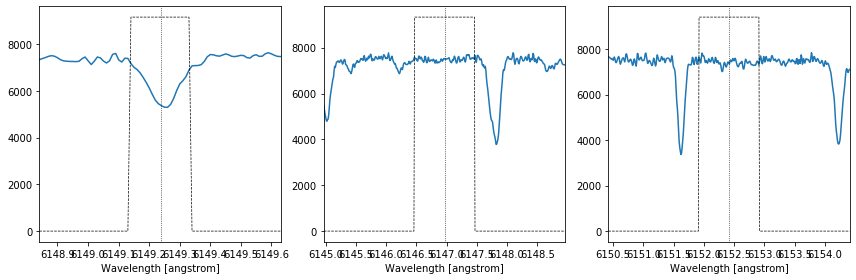

In [5]:
import os, glob
file = glob.glob(os.path.join(os.pardir, "actin2", "test", "HARPS-N", "*_s1d_A.fits"))

%matplotlib inline
actin.plot_index_lines(file, 'I_FeII', table_df=ind_tab.table)

And the index calculated:

In [6]:
df = actin.run(file, "I_FeII", table_df=ind_tab.table)
df[['I_FeII', 'I_FeII_err']]

100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


,I_FeII,I_FeII_err
0,0.451275,0.001272


If you are testing new indices it could be useful to also extract the individual fluxes in the lines. This can be done by activating the `full_output` option via the `calcind_kw` keyword argument:

In [7]:
df = actin.run(file, "I_FeII", table_df=ind_tab.table, calcind_kw=dict(full_output=True))
df[['FeII_F', 'FeII_F_err', 'FeIIR1_F', 'FeIIR1_F_err', 'FeIIR2_F', 'FeIIR2_F_err']]

100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


,FeII_F,FeII_F_err,FeIIR1_F,FeIIR1_F_err,FeIIR2_F,FeIIR2_F_err
0,686190.952148,1852.282959,763766.467285,873.937326,756793.547852,869.938783
